## Reference ocean currents fileds

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [4]:
path_OSSE_train = "data/OSSE_U_V_SLA_SST_train.nc"
path_OSSE_test = "data/OSSE_U_V_SLA_SST_test.nc"

Time range from 2015-01-02T12:00:00.000000000  to 2015-12-25T12:00:00.000000000


/var/folders/m3/k2rlmgps1yg0xlxmdh61l9pw0000gn/T/ipykernel_68898/214557489.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax[1] = sb.distplot(OSSE_train.sossheig.mean(('latitude', 'longitude'), skipna = True))


Text(0, 0.5, 'count')

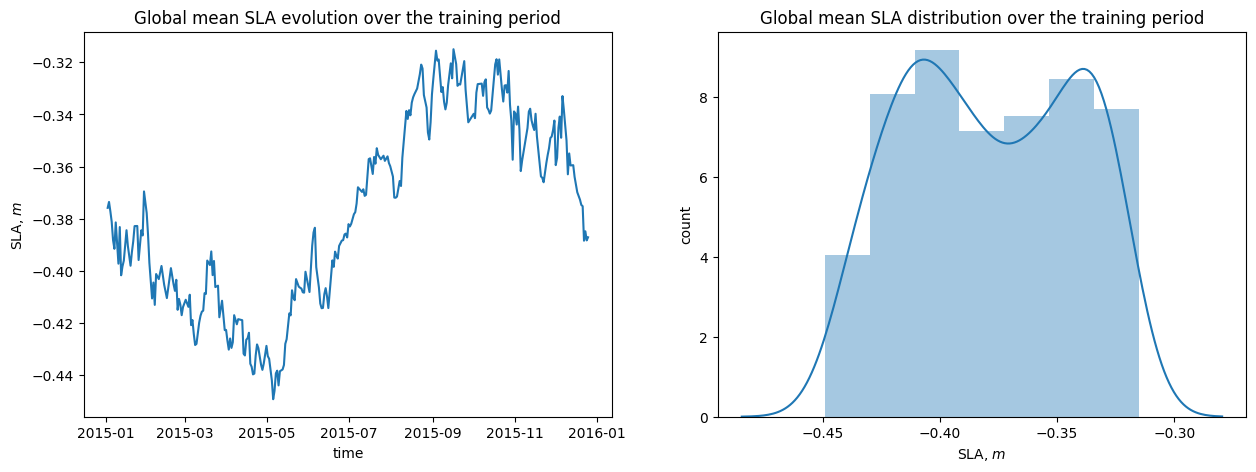

In [5]:
OSSE_train = xr.open_dataset(path_OSSE_train)
print(f'Time range from', OSSE_train.time_counter.min().values, ' to', OSSE_train.time_counter.max().values)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(OSSE_train.time_counter.values, OSSE_train.sossheig.mean(('latitude', 'longitude'), skipna = True))
ax[0].set_title('Global mean SLA evolution over the training period')
ax[0].set_ylabel(r'SLA, $m$')
ax[0].set_xlabel('time')

ax[1] = sb.distplot(OSSE_train.sossheig.mean(('latitude', 'longitude'), skipna = True))
ax[1].set_title('Global mean SLA distribution over the training period')
ax[1].set_xlabel(r'SLA, $m$')
ax[1].set_ylabel('count')

Time range from 2015-01-01T12:00:00.000000000  to 2015-12-18T12:00:00.000000000


/var/folders/m3/k2rlmgps1yg0xlxmdh61l9pw0000gn/T/ipykernel_68898/2025472506.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax[1] = sb.distplot(OSSE_test.sossheig.mean(('latitude', 'longitude'), skipna = True))


Text(0, 0.5, 'count')

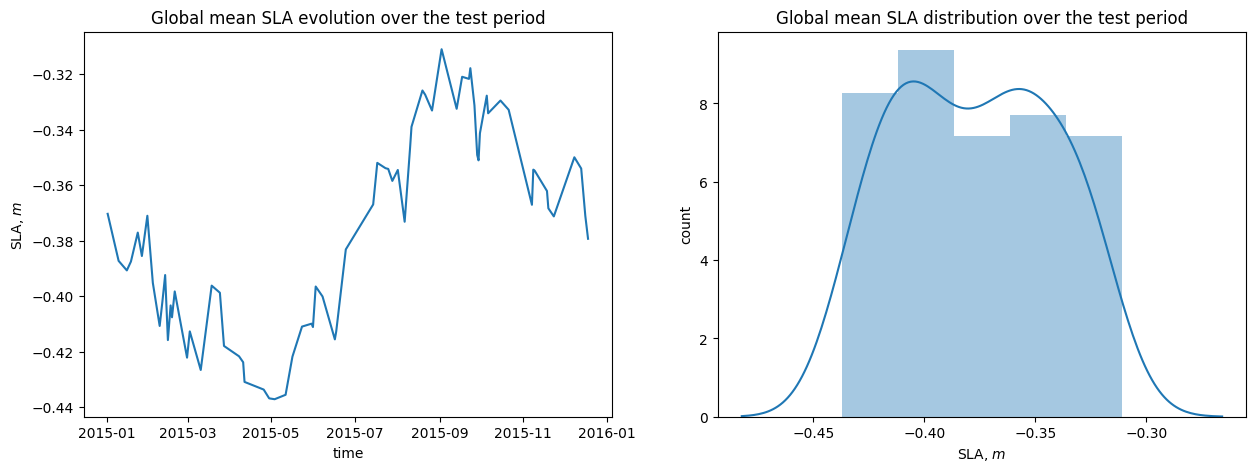

In [6]:
OSSE_test = xr.open_dataset(path_OSSE_test)
print(f'Time range from', OSSE_test.time_counter.min().values, ' to', OSSE_test.time_counter.max().values)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(OSSE_test.time_counter.values, OSSE_test.sossheig.mean(('latitude', 'longitude'), skipna = True))
ax[0].set_title('Global mean SLA evolution over the test period')
ax[0].set_ylabel(r'SLA, $m$')
ax[0].set_xlabel('time')

ax[1] = sb.distplot(OSSE_test.sossheig.mean(('latitude', 'longitude'), skipna = True))
ax[1].set_title('Global mean SLA distribution over the test period')
ax[1].set_xlabel(r'SLA, $m$')
ax[1].set_ylabel('count')

## Eddies maps generated using py-eddy-tracker tool : github.com/... 
### The tool was applied on Nature Run SSH fields

In [7]:
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cmocean'

In [ ]:
path_eddies_train = "../eddies_train.nc"
path_eddies_test = "../eddies_test.nc"

In [ ]:
eddies_train = xr.open_dataset(path_eddies_train)
eddies_test = xr.open_dataset(path_eddies_test)

## Animate eddies on the top of the corresponding SSH fields

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cmocean
import pandas as pd
import matplotlib.colors as mcolors

def animate_ssh_eddies(ds, ds_eddies, data_source):
    num_times = ds.time_counter.shape[0] // 10

    fig, ax = plt.subplots(figsize=(10, 6))

    sla = ds["sossheig"].isel(time_counter=0)
    sla_plot = ax.imshow(sla, cmap=cmocean.cm.balance, origin="lower")
    
    
    eddies = ds_eddies["eddies"].isel(time=0)
    contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)

    cbar = plt.colorbar(sla_plot, ax=ax, orientation="vertical", label=r"Sea Surface Height, $m$", pad=0.03, fraction=0.025)
    cbar_eddies = plt.colorbar(contour, ax=ax, orientation="horizontal", ticks=[1, 2], label="Eddy Type", fraction=0.046, pad=0.1)
    cbar_eddies.set_ticklabels(['Cyclonic', 'Anticyclonic'])
    
    ax.set_title("SSH for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time_counter"].isel(time_counter = 0).values).date()))

    def update(time_idx):
        sla = ds["sossheig"].isel(time_counter=time_idx)
        sla_plot.set_data(sla) 
        
        for c in ax.collections: 
            c.remove()
            
        eddies = ds_eddies["eddies"].isel(time=time_idx)
        contour = ax.contour(eddies, levels=[0, 1, 2]) 

        ax.set_title("SLA for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time_counter"].isel(time_counter = time_idx).values).date()))
        return sla_plot, 

    anim = animation.FuncAnimation(fig, update, frames=num_times, interval=700, repeat=True)

    plt.show()
    
    anim.save('sla_eddies_animation_' + data_source +'.mp4', writer='ffmpeg', fps=10)

: 

/tmp/ipykernel_1120030/2593229576.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)


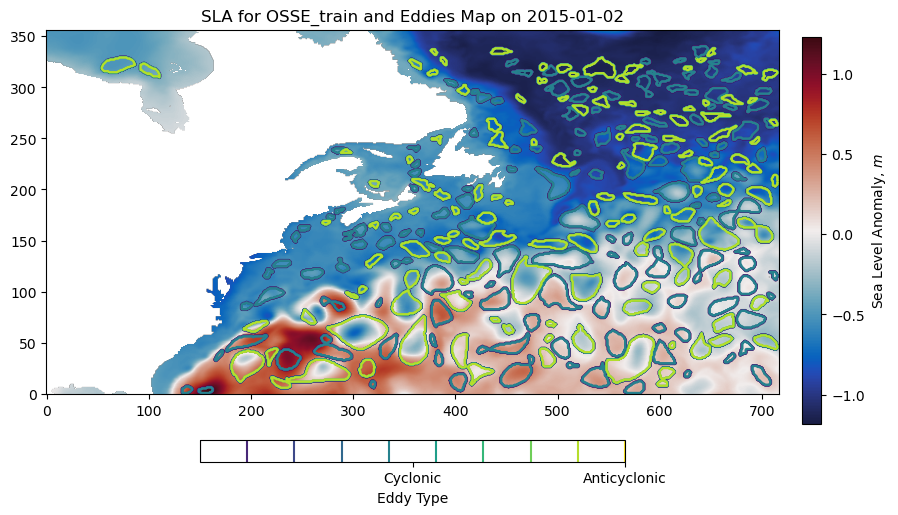

In [ ]:
animate_ssh_eddies(OSSE_train, eddies_train, "OSSE_train")

## Animate eddies on the top of the corresponding velocity fields

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cmocean
import pandas as pd
import matplotlib.colors as mcolors

def animate_velocities_eddies(ds, ds_eddies, data_source):
    num_times = ds.time_counter.shape[0]

    fig, ax = plt.subplots(figsize=(10, 6))

    uv = np.sqrt(ds["vozocrtxT"].isel(time_counter=0) ** 2 + ds["vomecrtyT"].isel(time_counter=0) ** 2)
    uv_plot = ax.imshow(uv, cmap=cmocean.cm.balance, origin="lower")
    
    eddies = ds_eddies["eddies"].isel(time=0)
    contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)

    cbar = plt.colorbar(uv_plot, ax=ax, orientation="vertical", label=r"Velocity magnitude, $m/s$", pad=0.03, fraction=0.025)
    cbar_eddies = plt.colorbar(contour, ax=ax, orientation="horizontal", ticks=[1, 2], label="Eddy Type", fraction=0.046, pad=0.1)
    cbar_eddies.set_ticklabels(['Cyclonic', 'Anticyclonic'])
    
    ax.set_title("Velocity magnitude for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time_counter"].isel(time_counter = 0).values).date()))

    def update(time_idx):
        uv = np.sqrt(ds["vozocrtxT"].isel(time_counter=time_idx) ** 2 + ds["vomecrtyT"].isel(time_counter=time_idx) ** 2)
        uv_plot.set_data(uv) 
        
        for c in ax.collections: 
            c.remove()
            
        eddies = ds_eddies["eddies"].isel(time=time_idx)
        contour = ax.contour(eddies, levels=[0, 1, 2]) 

        ax.set_title("Velocity magnitude for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time_counter"].isel(time_counter = time_idx).values).date()))
        return uv_plot, 

    anim = animation.FuncAnimation(fig, update, frames=num_times, interval=700, repeat=True)

    plt.show()
    
    anim.save('velocities_eddies_animation_' + data_source +'.mp4', writer='ffmpeg', fps=10)

: 

/tmp/ipykernel_1120030/1594122808.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)


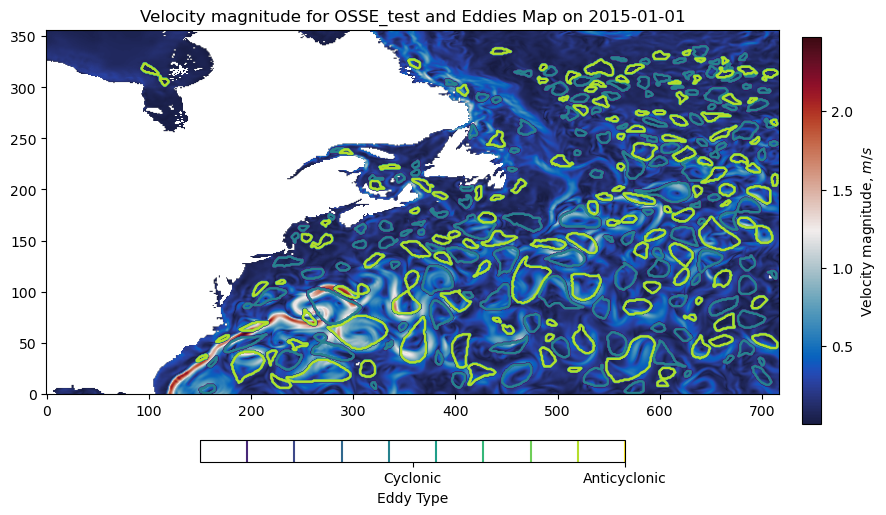

: 

In [ ]:
animate_velocities_eddies(OSSE_test, eddies_test, "OSSE_test")

## Animate eddies on the top of the corresponding temperature fields

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cmocean
import pandas as pd
import matplotlib.colors as mcolors

def animate_temperature_eddies(ds, ds_eddies, data_source):
    num_times = ds.time_counter.shape[0]

    fig, ax = plt.subplots(figsize=(10, 6))

    SST = ds["votemper"].isel(time_counter=0)
    SST_plot = ax.imshow(SST, cmap=cmocean.cm.thermal, origin="lower")
    
    eddies = ds_eddies["eddies"].isel(time=0)
    contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)

    cbar = plt.colorbar(SST_plot, ax=ax, orientation="vertical", label=r"Temperature, $°C$", pad=0.03, fraction=0.025)
    cbar_eddies = plt.colorbar(contour, ax=ax, orientation="horizontal", ticks=[1, 2], label="Eddy Type", fraction=0.046, pad=0.1)
    cbar_eddies.set_ticklabels(['Cyclonic', 'Anticyclonic'])
    
    ax.set_title("SST for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time_counter"].isel(time_counter = 0).values).date()))

    def update(time_idx):
        SST = ds["votemper"].isel(time_counter=time_idx)
        SST_plot.set_data(SST) 
        
        for c in ax.collections: 
            c.remove()
            
        eddies = ds_eddies["eddies"].isel(time=time_idx)
        contour = ax.contour(eddies, levels=[0, 1, 2]) 

        ax.set_title("SST for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time_counter"].isel(time_counter = time_idx).values).date()))
        return SST_plot, 

    anim = animation.FuncAnimation(fig, update, frames=num_times, interval=700, repeat=True)

    plt.show()
    
    anim.save('sst_eddies_animation_' + data_source +'.mp4', writer='ffmpeg', fps=10)

: 

/tmp/ipykernel_1120030/2595954668.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)


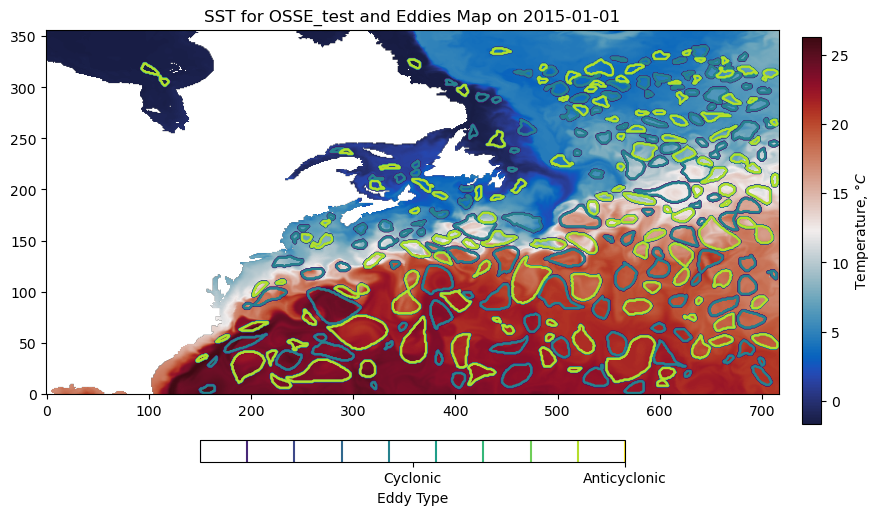

In [ ]:
animate_temperature_eddies(OSSE_test, eddies_test, "OSSE_test")

## GLORYS12 check data

In [ ]:
path_GLORYS12 = "2019_GLO12_UV_T_SLA_EDDIES.nc"

In [ ]:
GLORYS12_train = xr.open_dataset(path_GLORYS12)

Time range from 2019-01-01T12:00:00.000000000  to 2019-12-24T12:00:00.000000000


/tmp/ipykernel_1162425/3957433877.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax[1] = sb.distplot(GLORYS12_train.zos.mean(('latitude', 'longitude'), skipna = True))


Text(0, 0.5, 'count')

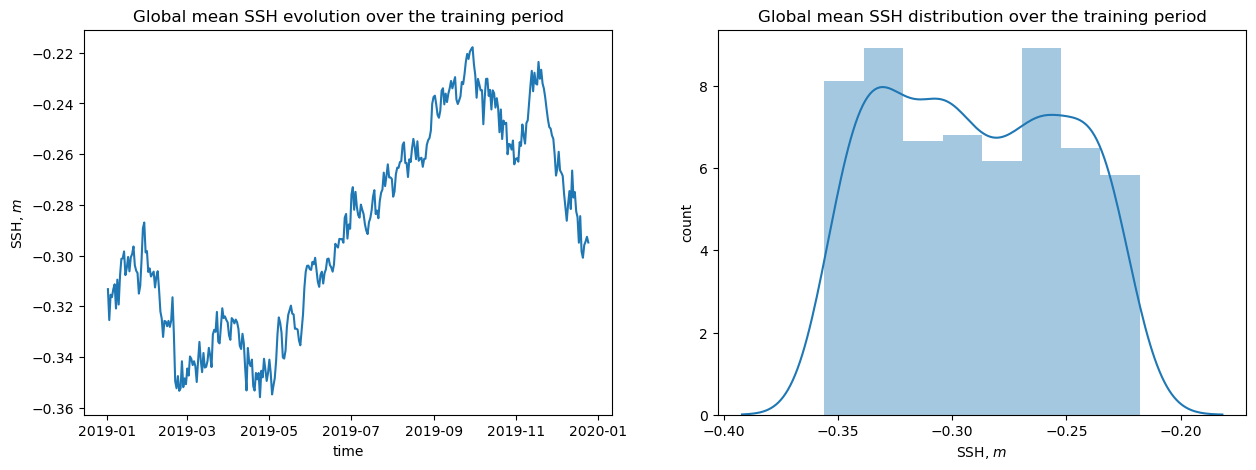

In [ ]:
print(f'Time range from', GLORYS12_train.time.min().values, ' to', GLORYS12_train.time.max().values)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(GLORYS12_train.time.values, GLORYS12_train.zos.mean(('latitude', 'longitude'), skipna = True))
ax[0].set_title('Global mean SSH evolution over the training period')
ax[0].set_ylabel(r'SSH, $m$')
ax[0].set_xlabel('time')

ax[1] = sb.distplot(GLORYS12_train.zos.mean(('latitude', 'longitude'), skipna = True))
ax[1].set_title('Global mean SSH distribution over the training period')
ax[1].set_xlabel(r'SSH, $m$')
ax[1].set_ylabel('count')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cmocean
import pandas as pd
import matplotlib.colors as mcolors

def animate_ssh_eddies_GLORYS12(ds, ds_eddies, data_source):
    num_times = ds.time.shape[0] // 10

    fig, ax = plt.subplots(figsize=(10, 6))

    sla = ds["zos"].isel(time=0)
    sla_plot = ax.imshow(sla, cmap=cmocean.cm.balance, origin="lower")
    
    
    eddies = ds_eddies["eddies"].isel(time=0)
    contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)

    cbar = plt.colorbar(sla_plot, ax=ax, orientation="vertical", label=r"Sea Surface Height, $m$", pad=0.03, fraction=0.025)
    cbar_eddies = plt.colorbar(contour, ax=ax, orientation="horizontal", ticks=[1, 2], label="Eddy Type", fraction=0.046, pad=0.1)
    cbar_eddies.set_ticklabels(['Cyclonic', 'Anticyclonic'])
    
    ax.set_title("SSH for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time"].isel(time = 0).values).date()))

    def update(time_idx):
        sla = ds["zos"].isel(time=time_idx)
        sla_plot.set_data(sla) 
        
        for c in ax.collections: 
            c.remove()
            
        eddies = ds_eddies["eddies"].isel(time=time_idx)
        contour = ax.contour(eddies, levels=[0, 1, 2]) 

        ax.set_title("SLA for " + data_source + " and Eddies Map on " +  str(pd.to_datetime(ds["time"].isel(time = time_idx).values).date()))
        return sla_plot, 

    anim = animation.FuncAnimation(fig, update, frames=num_times, interval=700, repeat=True)

    plt.show()
    
    anim.save('glorys12_sla_eddies_animation_' + data_source +'.mp4', writer='ffmpeg', fps=10)

/tmp/ipykernel_1162425/1018696922.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  contour = ax.contour(eddies, levels=np.linspace(0, 2, 10), linewidth = 1)


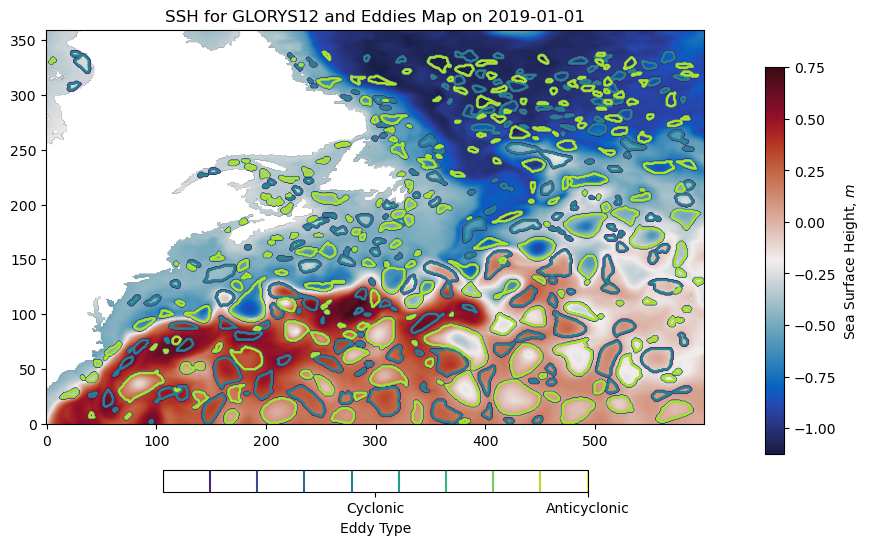

In [ ]:
animate_ssh_eddies_GLORYS12(GLORYS12_train, GLORYS12_train, "GLORYS12")

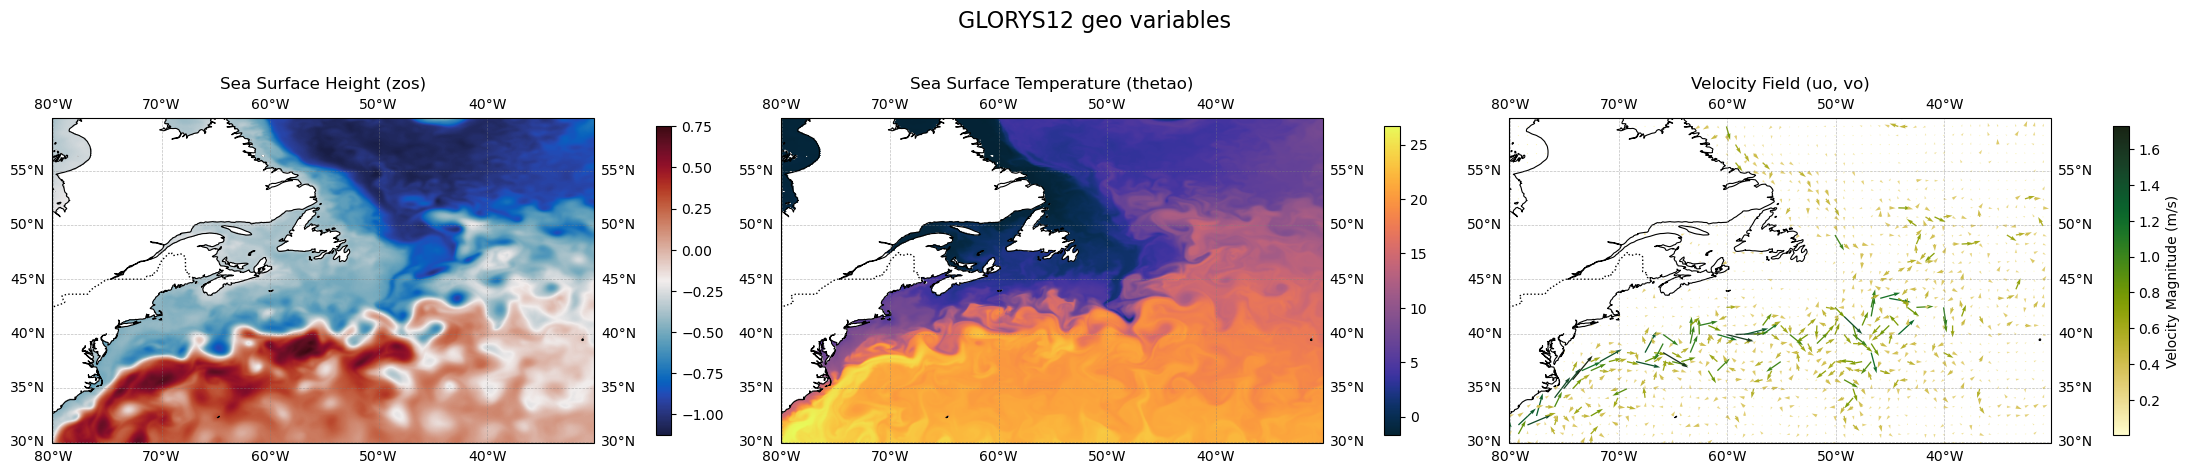

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ds = xr.open_dataset("GLORYS12_validate_geo_vars_extracted.nc")

time_idx = 0

zos = ds["zos"].isel(time=time_idx)
thetao = ds["thetao"].isel(time=time_idx)
uo = ds["uo"].isel(time=time_idx)
vo = ds["vo"].isel(time=time_idx)

lat = ds.latitude.values
lon = ds.longitude.values
lon_grid, lat_grid = np.meshgrid(lon, lat)

speed = np.sqrt(uo**2 + vo**2)

step = 10  
uo_sub = uo[::step, ::step]
vo_sub = vo[::step, ::step]
speed_sub = speed[::step, ::step]
lon_sub = lon_grid[::step, ::step]
lat_sub = lat_grid[::step, ::step]

projection = ccrs.PlateCarree()

fig, axes = plt.subplots(1, 3, figsize=(22, 6), subplot_kw={"projection": projection})

def setup_map(ax, title):
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
    ax.set_title(title)


im1 = axes[0].imshow(zos, cmap=cmocean.cm.balance, origin="lower", extent=[lon.min(), lon.max(), lat.min(), lat.max()], transform=projection)
setup_map(axes[0], "Sea Surface Height (zos)")
plt.colorbar(im1, ax=axes[0], orientation="vertical", fraction = 0.025, pad = 0.1)

im2 = axes[1].imshow(thetao, cmap=cmocean.cm.thermal, origin="lower", extent=[lon.min(), lon.max(), lat.min(), lat.max()], transform=projection)
setup_map(axes[1], "Sea Surface Temperature (thetao)")
plt.colorbar(im2, ax=axes[1], orientation="vertical", fraction = 0.025, pad = 0.1)

quiv = axes[2].quiver(lon_sub, lat_sub, uo_sub, vo_sub, speed_sub, cmap=cmocean.cm.speed, scale=30, transform=projection)
setup_map(axes[2], "Velocity Field (uo, vo)")

cbar = plt.colorbar(quiv, ax=axes[2], orientation="vertical", label="Velocity Magnitude (m/s)", fraction = 0.025, pad = 0.1)

plt.suptitle('GLORYS12 geo variables', y = 0.92, fontsize = 16)

plt.tight_layout()
plt.show()
